# Loading a text file containing tweets

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Let us now read the tweets as list of lines
path = "/content/drive/MyDrive/Fall 2023/Applied Data Science/datasets/covid19_misinformation_data.txt" # edit the path to your folder containing the data file
tweets = ""
with open(path,"r") as file:
    # we'll read that into a variable called tweets
    tweets=file.readlines()



#looking at the structure of the tweets
tweets

['1055WERC || Tue Mar 10 14:38:00 +0000 2020 || PAGS PARODY! Plus, Joe talks coronavirus and has special guest Peter J Hasson on his new book. - @JoeTalkShow https://t.co/IJE4gZwI0V || 0.2819662242 || irrelevant\n',
 'fasteddiekc || Wed Mar 18 07:16:32 +0000 2020 || #coronavirus shows that racists have absolutely 2 much time on their hands Firstly, those racists who hate POC &amp; R… https://t.co/M72D8jbgt2 || 0.8441984525 || irrelevant\n',
 'Atho_1982 || Sat Mar 21 11:24:40 +0000 2020 || @Laura1206 @ShitChester I would expect front line staff to be more of a risk of having coronavirus than the average… https://t.co/HO3I8yx6ly || 0.2633729135 || irrelevant\n',
 'Georgia_VOL || Sun Mar 22 23:40:18 +0000 2020 || If your mountain of toilet paper falls on you and kills you, did you die from the coronavirus? || 0.8548931203 || irrelevant\n',
 'interaksyon || Thu Mar 26 03:58:16 +0000 2020 || The coronavirus is not only affecting the way we live, it’s also dramatically affecting the way we d

#Looking at the tweets categories

In [4]:
from collections import Counter
import re

def categories_to_counts(tweets):
  category_to_count_dict = {}


  #Defining a robust pattern designed to capture the tweet as per the way it has been described
  pattern1="([A-Za-z0-9_]+) \|\| ([\wA-Z:+ ]+) \|\| ([\wA-Z:\.#&,;\s/…@?'\W ]+) \|\| ([0-9\.]+) \|\| ([\wA-Z ]+)"
  #Initializing an empty list titled category
  categories=[]
  #iterating through the list of provided tweets
  for item in tweets:
    #looking through every partucular tweet to see whether it matches requirement of the defined pattern
      matches=re.search(pattern1,item)
      #adding to the list categories the category part of every tweet through the group mechanism
      categories.append(matches.group(5))
  #using the Counter function to get a count of the number of times each element repeats itself
  category_to_count_dict=Counter(categories)



  return category_to_count_dict

c2c_dict = categories_to_counts(tweets)

print(c2c_dict)

Counter({'calling out or correction': 1331, 'conspiracy': 924, 'politics': 512, 'sarcasm or satire': 476, 'false fact or prevention': 321, 'true prevention': 175, 'true public health response': 163, 'ambiguous or hard to classify': 143, 'fake cure': 141, 'irrelevant': 131, 'news': 95, 'panic buying': 70, 'commercial activity or promotion': 37, 'fake treatment': 34, 'emergency': 17, 'false public health response': 3})


#Visualizing the distribution of data/tweets categories

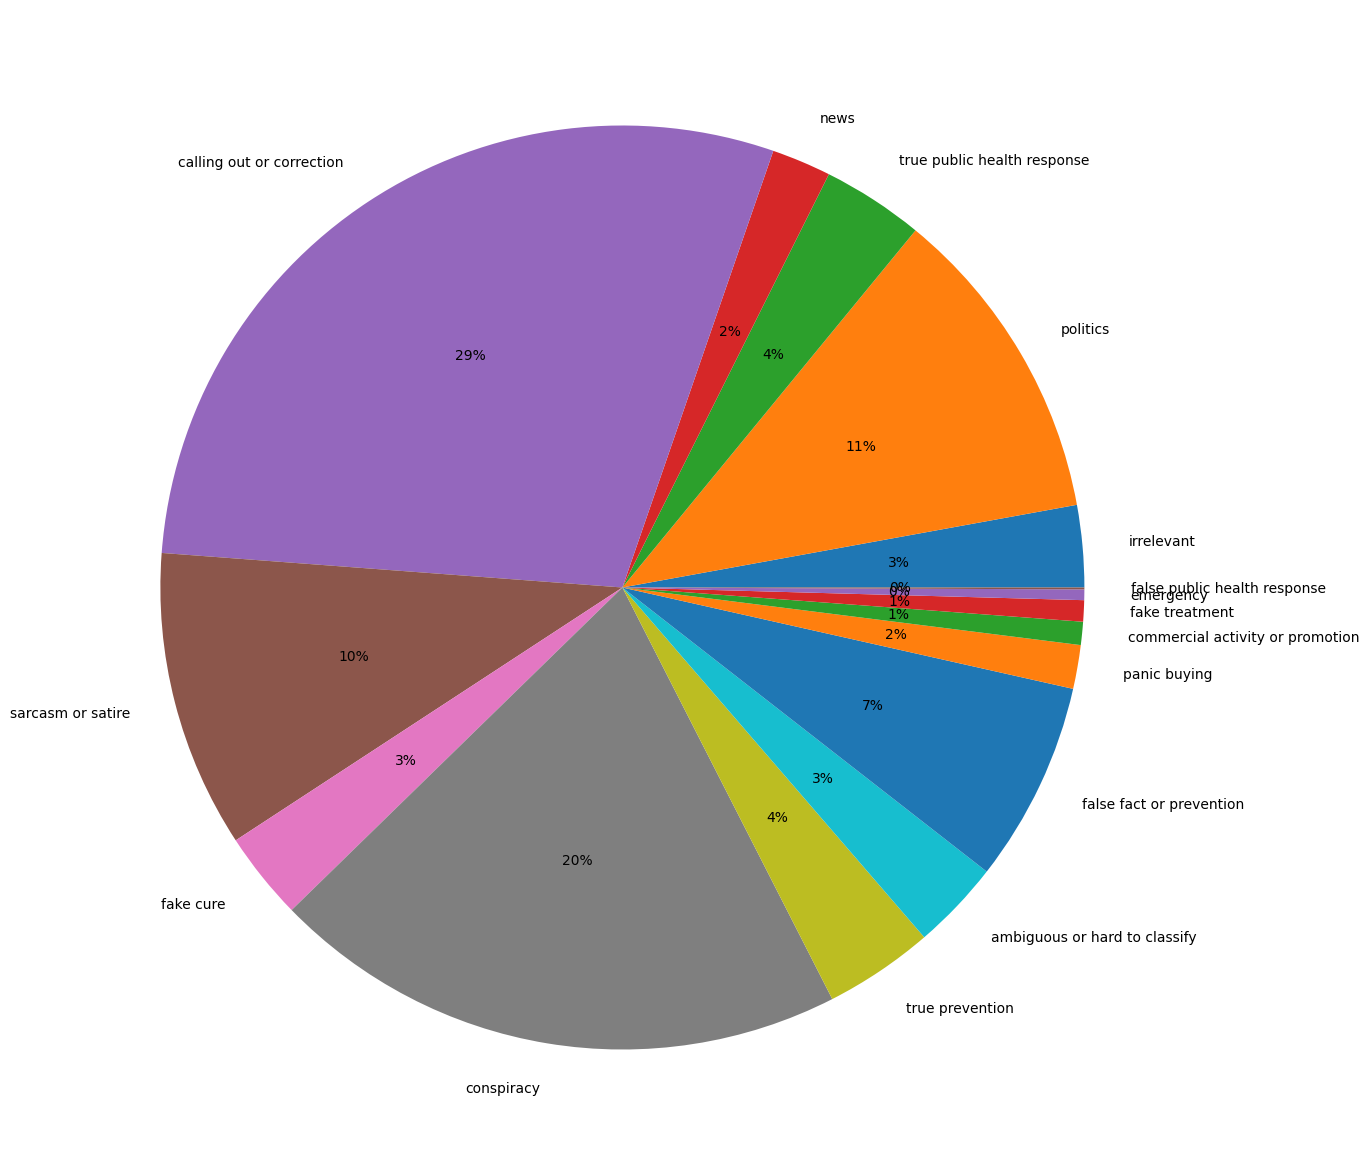

In [5]:
# importing appropriate libraries
from matplotlib import pyplot as plt

def create_pie_chart(counts_dictionary):
  # Creating a plot
  fig = plt.figure(figsize =(15, 15))
  data = counts_dictionary.values()
  categories = counts_dictionary.keys()
  plt.pie(data, labels = categories, autopct='%1.0f%%')
  # Displaying the plot
  plt.show()

create_pie_chart(c2c_dict)

# Looking at Hashtag distribution in informed and misinformed users

In [6]:
import re

def average_hashtags_per_class(tweets):

  informed_categories = ['calling out or correction', 'true prevention', 'true public health response', 'sarcasm or satire']
  misinformed_categories = ['conspiracy', 'false fact or prevention', 'fake cure', 'fake treatment', 'false public health response']

  average_hashtags_informed = 0
  average_hashtags_misinformed = 0


  #using a pattern to capture every correctly formatted tweeet
  pattern1="([A-Za-z0-9_]+) \|\| ([\wA-Z:+ ]+) \|\| ([\wA-Z:\.#&,;\s/…@?'\W ]+) \|\| ([0-9\.]+) \|\| ([\wA-Z ]+)"
  sum_informed_tweets=0
  sum_misinformed_tweets=0
  sum_informed_hash=0;
  sum_misinformed_hash=0;


  #for every tweet in the list tweets, we get its respectective category
  for item in tweets:
    complete_match=re.search(pattern1,item)
    category=(complete_match.group(5)).strip()
   #we check whether the category classifies as informed or misinformed
    if category in informed_categories:
      #we increment count for the specific category the tweet being analysed belongs to
      sum_informed_tweets=sum_informed_tweets+1
      #we get a list of all the hashtags within each specific tweet
      all_informed_hash=re.findall("#",item)
      #we get the total number of hashtags within that specific tweet
      number_hash=len(all_informed_hash)
      #add the current number of hashtags to total number of hashtags captured so far
      sum_informed_hash=sum_informed_hash+number_hash
    elif category in misinformed_categories:
      #we increment count for the specific category the tweet being analysed belongs to
      sum_misinformed_tweets=sum_misinformed_tweets+1
      #we get a list of all the hashtags within each specific tweet
      all_misinformed_hash=re.findall("#",item)
      #we get the total number of hashtags within that specific tweet
      number_hash=len(all_misinformed_hash)
      #add the current number of hashtags to total number of hashtags captured so far
      sum_misinformed_hash=sum_misinformed_hash+number_hash

  # we calculate the averages as required
  average_hashtags_informed= sum_informed_hash/sum_informed_tweets
  average_hashtags_misinformed=sum_misinformed_hash/sum_misinformed_tweets




  # Printing average values
  print("Informed users use %f hashtags on average in a tweet"%average_hashtags_informed)
  print("Misinformed users use %f hashtags on average in a tweet"%average_hashtags_misinformed)

average_hashtags_per_class(tweets)

Informed users use 0.369231 hashtags on average in a tweet
Misinformed users use 0.924104 hashtags on average in a tweet


#Retrieving Possible Bot Accounts

In [7]:
def get_bot_accounts(tweet, pattern):
  for item in re.finditer(pattern,tweet):
    print(item.groupdict())

#using a pattern and named groups that first capture the username and then the botprob.
# Matches are stored in a dictionary-like object.
# botprob has been included in the regex such that probabilies greater than 0.7 are captured
pattern = "(?P<username>[A-Za-z0-9_ ]+) \|\| .+ \|\| .+ \|\| (?P<botprob>0\.[7-9][0-9]*)"

for tweet in tweets:
  get_bot_accounts(tweet.rstrip(), pattern)

{'username': 'fasteddiekc', 'botprob': '0.8441984525'}
{'username': 'Georgia_VOL', 'botprob': '0.8548931203'}
{'username': 'saintevenlive', 'botprob': '0.8002252668000001'}
{'username': 'ioncorruption', 'botprob': '0.7434430488'}
{'username': 'Whatali38649130', 'botprob': '0.8823683413'}
{'username': 'VaxxHappenedBOT', 'botprob': '0.8060377889'}
{'username': 'VaxxHappenedBOT', 'botprob': '0.8060377889'}
{'username': 'SaltLakeCity_NC', 'botprob': '0.7511966631'}
{'username': 'Whatali38649130', 'botprob': '0.8823683413'}
{'username': 'ManoGov', 'botprob': '0.7892904798999999'}
{'username': 'ManoGov', 'botprob': '0.7892904798999999'}
{'username': 'ManoGov', 'botprob': '0.7892904798999999'}
{'username': 'ManoGov', 'botprob': '0.7892904798999999'}
{'username': 'DreamerEagan', 'botprob': '0.8544307287'}
{'username': 'nuahn', 'botprob': '0.7091342216'}
{'username': 'angelneptustar', 'botprob': '0.9132901526'}
{'username': 'Herbsistah', 'botprob': '0.8457665123999999'}
{'username': 'GallaherCa